# PART 1 : Dataset Analysis with VSC

INSTALLATIONS & IMPORT LIBRAIRIES NEEDED

In [2]:
# Loading librairies needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

GETTING INFORMATION ABOUT THE DATASET

In [3]:
# Loading the dataset 
dataset = pd.read_excel("src/get_around_delay_analysis.xlsx")

In [4]:
#dataset.shape
dataset.shape

(21310, 7)

In [5]:
# Visualazing the first 20 rows of the dataset
dataset.head(20)

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000.0,363965.0,mobile,canceled,NaN,NaN,NaN
1,507750.0,269550.0,mobile,ended,-81.0,NaN,NaN
2,508131.0,359049.0,connect,ended,70.0,NaN,NaN
3,508865.0,299063.0,connect,canceled,NaN,NaN,NaN
4,511440.0,313932.0,mobile,ended,NaN,NaN,NaN
5,511626.0,398802.0,mobile,ended,-203.0,NaN,NaN
6,511639.0,370585.0,connect,ended,-15.0,563782.0,570.0
7,512303.0,371242.0,mobile,ended,-44.0,NaN,NaN
8,512475.0,322502.0,mobile,canceled,NaN,NaN,NaN
9,513434.0,256528.0,connect,ended,23.0,NaN,NaN


DATASET PRESENTATION : 
* 'rental_id' : from this column, we just can count the number of rental. It is an ID column, we have to delete it from the dataset
* 'car_id' : from this columnm, we just can count the number unique of car of the dataset
* 'checkin_type' : from this column, we have 3 choices : 'mobile', 'connect' and 'paper'. This is different way to manage rental car. We can see the repartition of this columns to find a correlation between late rental and checkin type
* 'state' : here, we have the state of the rental car. We have 2 choices : 'ended', 'cancelled'. We will analyse this column
* 'delay_at_checkout_in_minutes' : this column is not enought clear. we have to tranforme data in this column to understand better the information that this coluns bring to us.
* 'previous_ended_rental_id' : this column is filled only when the rental car ID have a rental after. So that why is it not filled and have missing value. We have to keep this information to further analysis
* 'time_delta_with_previous_rental_in_minutes' : this column is not clear for a client. This column count the delta time between the time of rental and the time this rental have to be return. This is an interesting column to analyze and determine a threshold.

In [6]:
# Looking for more analysis of the dataset due to describe function
dataset.describe(include='all')

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


Bellow we can see that some feature have missing value, let's check the number of it

CHECKING MISSING VALUE MANAGEMENT

In [7]:
# Let's see if we have missing value in the dataset
dataset.isnull().sum()

rental_id                                         0
car_id                                            0
checkin_type                                      0
state                                             0
delay_at_checkout_in_minutes                   4964
previous_ended_rental_id                      19469
time_delta_with_previous_rental_in_minutes    19469
dtype: int64

* We can see that only 'delay_at_checkout_in_minutes',' previous_ended_rental_id','time_delta_with_previous_rental_in_minutes' have some missing value. 
* But delay_at_checkout_in_minutes is normal to have missing value because missing value mean that at the rental there is no delay, so we have to keep this value and change it.
* 'previous_ended_rental_id' and 'time_delta_with_previous_rental_in_minutes' are correlated. Under 21310 rental ID there is 19469 were that don't have previous rental car. So we can keep missing value and change it into zero.

In [8]:
# Filling the Nan value on 'delay_at_checkout_in_minutes' missing. We can still keep this for unknow 
# value and keep more informations
dataset.delay_at_checkout_in_minutes = dataset.delay_at_checkout_in_minutes.fillna(0)
dataset.previous_ended_rental_id = dataset.previous_ended_rental_id.fillna(0)
dataset.time_delta_with_previous_rental_in_minutes = dataset.time_delta_with_previous_rental_in_minutes.fillna(0)

In [9]:
# Checking if the tranformation has been well done
dataset.head(20)

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000.0,363965.0,mobile,canceled,0.0,0.0,0.0
1,507750.0,269550.0,mobile,ended,-81.0,0.0,0.0
2,508131.0,359049.0,connect,ended,70.0,0.0,0.0
3,508865.0,299063.0,connect,canceled,0.0,0.0,0.0
4,511440.0,313932.0,mobile,ended,0.0,0.0,0.0
5,511626.0,398802.0,mobile,ended,-203.0,0.0,0.0
6,511639.0,370585.0,connect,ended,-15.0,563782.0,570.0
7,512303.0,371242.0,mobile,ended,-44.0,0.0,0.0
8,512475.0,322502.0,mobile,canceled,0.0,0.0,0.0
9,513434.0,256528.0,connect,ended,23.0,0.0,0.0


Great, now as we finish to manage missing value, we can modify some value to analyse more simply the information

In [10]:
# Creating a new column for classification previous_rental yes or no
dataset['previous_rental'] = dataset.previous_ended_rental_id.apply(lambda x : "No" if x==0 else "Yes")

In [11]:
# Creating a new column for classification delay or not delay
dataset['is_delay'] = dataset.delay_at_checkout_in_minutes.apply(lambda x : "No" if x>=0 else "Yes")

In [12]:
# Checking transformations
dataset.head(50)

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,previous_rental,is_delay
0,505000.0,363965.0,mobile,canceled,0.0,0.0,0.0,No,No
1,507750.0,269550.0,mobile,ended,-81.0,0.0,0.0,No,Yes
2,508131.0,359049.0,connect,ended,70.0,0.0,0.0,No,No
3,508865.0,299063.0,connect,canceled,0.0,0.0,0.0,No,No
4,511440.0,313932.0,mobile,ended,0.0,0.0,0.0,No,No
5,511626.0,398802.0,mobile,ended,-203.0,0.0,0.0,No,Yes
6,511639.0,370585.0,connect,ended,-15.0,563782.0,570.0,Yes,Yes
7,512303.0,371242.0,mobile,ended,-44.0,0.0,0.0,No,Yes
8,512475.0,322502.0,mobile,canceled,0.0,0.0,0.0,No,No
9,513434.0,256528.0,connect,ended,23.0,0.0,0.0,No,No


MODIFYING TYPE VALUES TO PREPARE VISUALIZATION ANALYSIS

In [13]:
# Checking type value to manipulate correctly the dataset
dataset.dtypes

rental_id                                     float64
car_id                                        float64
checkin_type                                   object
state                                          object
delay_at_checkout_in_minutes                  float64
previous_ended_rental_id                      float64
time_delta_with_previous_rental_in_minutes    float64
previous_rental                                object
is_delay                                       object
dtype: object

In [14]:
# From float to object types for rental_id, car_id and previous_ended_rental_id
dataset.rental_id = dataset.rental_id.astype('object')
dataset.car_id = dataset.car_id.astype('object')
dataset.previous_ended_rental_id = dataset.previous_ended_rental_id.astype('object')

In [15]:
dataset.dtypes

rental_id                                      object
car_id                                         object
checkin_type                                   object
state                                          object
delay_at_checkout_in_minutes                  float64
previous_ended_rental_id                       object
time_delta_with_previous_rental_in_minutes    float64
previous_rental                                object
is_delay                                       object
dtype: object

There is some outlayers in the dataset. Let's create time category

In [16]:
dataset['delay_types'] = dataset['delay_at_checkout_in_minutes'].apply(lambda x : 'No_delay' if x == 0 else
                                                                                ('Less than an hours' if x >0 and x<60 else
                                                                                ('Less than an hours' if x <0 and x>-60 else
                                                                                ('1h to 3h' if x >=60 and x<180 else
                                                                                ('1h to 3h' if x <=-60 and x>-180 else
                                                                                ('3h to 6h' if x>=180 and x<360 else
                                                                                ('3h to 6h' if x<=-180 and x>-360 else
                                                                                ("6h to 12h" if x>=360 and x<720 else
                                                                                ('6h to 12h' if x<=-360 and x>-720 else
                                                                                ("12h to 24h"if x>=720 and x<1440 else
                                                                                ("12h to 24h"if x<=-720 and x>-1440 else
                                                                                ("One day" if x==1440 else
                                                                                ("One day" if x==-1440 else
                                                                                ("Two day" if x>1440 and x<2880 else
                                                                                ("Two day" if x<-1440 and x>-2880 else 
                                                                                "More than 3 days"
                                                                                )))))))))))))))

In [17]:
dataset['time_delta'] = dataset['time_delta_with_previous_rental_in_minutes'].apply(lambda x : 'No_time_delta' if x == 0 else
                                                                                ('Less than an hours' if x >0 and x<60 else
                                                                                ('Less than an hours' if x <0 and x>-60 else
                                                                                ('1h to 3h' if x >=60 and x<180 else
                                                                                ('1h to 3h' if x <=-60 and x>-180 else
                                                                                ('3h to 6h' if x>=180 and x<360 else
                                                                                ('3h to 6h' if x<=-180 and x>-360 else
                                                                                ("6h to 12h" if x>=360 and x<720 else
                                                                                ('6h to 12h' if x<=-360 and x>-720 else
                                                                                ("12h to 24h"if x>=720 and x<1440 else
                                                                                ("12h to 24h"if x<=-720 and x>-1440 else
                                                                                ("One day" if x==1440 else
                                                                                ("One day" if x==-1440 else
                                                                                ("Two day" if x>1440 and x<2880 else
                                                                                ("Two day" if x<-1440 and x>-2880 else 
                                                                                "More than 3 days"
                                                                                )))))))))))))))

In [18]:
# Checking the transformation applied
dataset.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,previous_rental,is_delay,delay_types,time_delta
0,505000.0,363965.0,mobile,canceled,0.0,0.0,0.0,No,No,No_delay,No_time_delta
1,507750.0,269550.0,mobile,ended,-81.0,0.0,0.0,No,Yes,1h to 3h,No_time_delta
2,508131.0,359049.0,connect,ended,70.0,0.0,0.0,No,No,1h to 3h,No_time_delta
3,508865.0,299063.0,connect,canceled,0.0,0.0,0.0,No,No,No_delay,No_time_delta
4,511440.0,313932.0,mobile,ended,0.0,0.0,0.0,No,No,No_delay,No_time_delta


In [19]:
# Counting the number of car 
number_of_car = len(set(dataset['car_id']))
number_of_car

8143

In [20]:
dataset["previous_rental"].value_counts()

No     19469
Yes     1841
Name: previous_rental, dtype: int64

In [21]:
mask = dataset['previous_rental'] == 'Yes'

df = dataset.loc[mask,:]

In [22]:
df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,previous_rental,is_delay,delay_types,time_delta
6,511639.0,370585.0,connect,ended,-15.0,563782.0,570.0,Yes,Yes,Less than an hours,6h to 12h
19,519491.0,312389.0,mobile,ended,58.0,545639.0,420.0,Yes,No,Less than an hours,6h to 12h
23,521156.0,392479.0,mobile,ended,0.0,537298.0,0.0,Yes,No,No_delay,No_time_delta
34,525044.0,349751.0,mobile,ended,0.0,510607.0,60.0,Yes,No,No_delay,1h to 3h
40,528808.0,181625.0,connect,ended,-76.0,557404.0,330.0,Yes,Yes,1h to 3h,3h to 6h


In [23]:
len(df['car_id'].unique().tolist())

1087

In [24]:
df["car_id"].value_counts()

334190.0    15
241021.0    13
365926.0    11
368432.0    11
390467.0    10
            ..
401740.0     1
375944.0     1
404774.0     1
343808.0     1
297973.0     1
Name: car_id, Length: 1087, dtype: int64

In [25]:
df["car_id"].value_counts().mean()

1.6936522539098435

In [26]:
list_car_ID = df["car_id"].value_counts().to_list()

In [27]:
from collections import Counter

elem = Counter(list_car_ID)

In [28]:
print(elem)         ## NOTE_ : FAIRE UN GRAPHIQUE STATISTIQUES DESSUS POIUR VOIR LA REPARTITION 

Counter({1: 718, 2: 210, 3: 73, 4: 40, 5: 15, 8: 8, 6: 8, 7: 7, 11: 2, 10: 2, 9: 2, 15: 1, 13: 1})


In [29]:
import statistics

In [30]:
print(statistics.median(list_car_ID))

1


DELETE USELESS COLUMNS

In [31]:
dataset = dataset.drop(columns= ['delay_at_checkout_in_minutes',
                                'previous_ended_rental_id',
                                'time_delta_with_previous_rental_in_minutes'])

In [32]:
dataset.head(50)

,rental_id,car_id,checkin_type,state,previous_rental,is_delay,delay_types,time_delta
0,505000.0,363965.0,mobile,canceled,No,No,No_delay,No_time_delta
1,507750.0,269550.0,mobile,ended,No,Yes,1h to 3h,No_time_delta
2,508131.0,359049.0,connect,ended,No,No,1h to 3h,No_time_delta
3,508865.0,299063.0,connect,canceled,No,No,No_delay,No_time_delta
4,511440.0,313932.0,mobile,ended,No,No,No_delay,No_time_delta
5,511626.0,398802.0,mobile,ended,No,Yes,3h to 6h,No_time_delta
6,511639.0,370585.0,connect,ended,Yes,Yes,Less than an hours,6h to 12h
7,512303.0,371242.0,mobile,ended,No,Yes,Less than an hours,No_time_delta
8,512475.0,322502.0,mobile,canceled,No,No,No_delay,No_time_delta
9,513434.0,256528.0,connect,ended,No,No,Less than an hours,No_time_delta


# Data preparation for analysis

CREATE DATAFRAME FOR VISUALIZATION TO RESPOND TO QUESTIONS

In [33]:
mask1 = dataset['previous_rental'] == 'Yes'
data_F1 = dataset.loc[mask1,:]

In [34]:
data_F1.head()

,rental_id,car_id,checkin_type,state,previous_rental,is_delay,delay_types,time_delta
6,511639.0,370585.0,connect,ended,Yes,Yes,Less than an hours,6h to 12h
19,519491.0,312389.0,mobile,ended,Yes,No,Less than an hours,6h to 12h
23,521156.0,392479.0,mobile,ended,Yes,No,No_delay,No_time_delta
34,525044.0,349751.0,mobile,ended,Yes,No,No_delay,1h to 3h
40,528808.0,181625.0,connect,ended,Yes,Yes,1h to 3h,3h to 6h


In [35]:
mask2 = data_F1['is_delay'] == "Yes"
data_F2 = data_F1.loc[mask2,:]

In [36]:
data_F2.head()

,rental_id,car_id,checkin_type,state,previous_rental,is_delay,delay_types,time_delta
6,511639.0,370585.0,connect,ended,Yes,Yes,Less than an hours,6h to 12h
40,528808.0,181625.0,connect,ended,Yes,Yes,1h to 3h,3h to 6h
64,533670.0,320824.0,connect,ended,Yes,Yes,Less than an hours,6h to 12h
74,534827.0,404169.0,mobile,ended,Yes,Yes,Less than an hours,1h to 3h
142,540217.0,398802.0,mobile,ended,Yes,Yes,12h to 24h,12h to 24h


In [37]:
mask3 = data_F1["state"] == 'ended'
data_F3 = data_F1.loc[mask3,:]

In [38]:
mask4 = data_F2["state"] == 'ended'
data_F4 = data_F2.loc[mask4,:]

In [39]:
mask5 = dataset['state'] == 'canceled'
data_F5 = dataset.loc[mask5,:]

In [40]:
mask6 = dataset['previous_rental'] == 'No'
data_F1 = dataset.loc[mask1,:]

# QUESTION 1 : How often are drivers late for the next check-in ? 

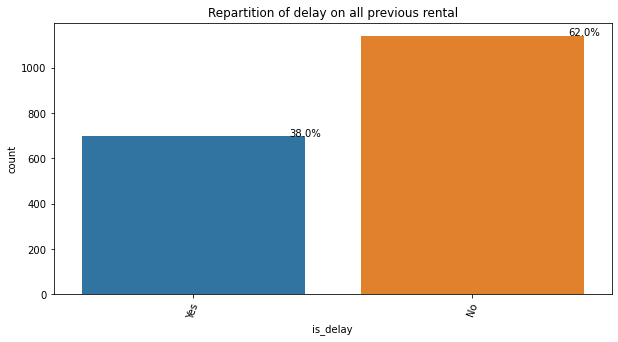

In [41]:
# Graph 1 - To know the distribution of late rental we gonna use de data_F1 (dataset with only previous rental) and x = "is-delay"
# Filter used :
#    'previous_rental' == 'Yes"
fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(data=data_F1, x="is_delay")                               
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_title("Repartition of delay on all previous rental")
total = float(len(data_F1))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

### Graph 1 - Quick data analysis :
### * As we can see, late rental represent 38% of previous rental against 62% who are not late. This is more than 1/3
###
### => *Answer to the question 1* :
### More than 1/3 are late for the next check-in.

# QUESTION 2 : How does it impact the next driver ?

### To know how does it impact the next driver we gonna analyze late return

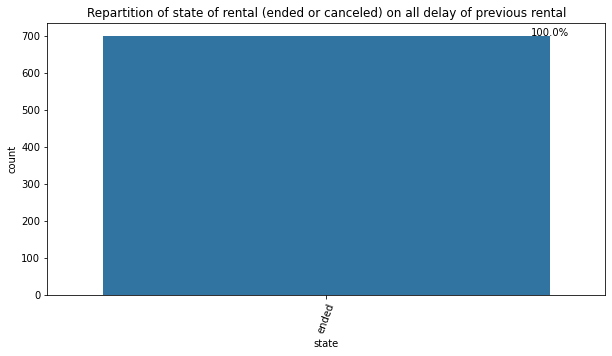

In [42]:
# Graph 2 - To know how late impact the next driver, we gonna use de data_F2 (dataset with only previous rental and delay) and x = "state"
# Filter used :
#    'previous_rental' == 'Yes"
#    'is_delay == 'Yes'

fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(data=data_F2, x="state")                               
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_title("Repartition of state of rental (ended or canceled) on all delay of previous rental")
total = float(len(data_F2))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

### Graph 2 - Quick data analysis :
### * We can see that all of driver keep their rental even if they are late
### * We can conclude that all next driver are unsatisfied.

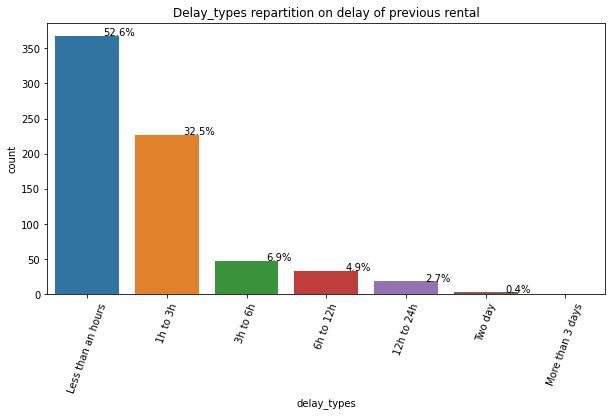

In [43]:
# Graph 3 - Now, we gonna see from late rental, how long are they late
# We gonna used data_F2 and x = 'delay_types'
# Filter used :
#    'previous_rental' == 'Yes"
#    'is_delay == 'Yes

fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(data=data_F2, x="delay_types", order = ["Less than an hours","1h to 3h", "3h to 6h", "6h to 12h","12h to 24h","Two day", "More than 3 days"])                                                    
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_title("Delay_types repartition on delay of previous rental")
total = float(len(data_F2))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

### Graph 3 - Quick data analysis :
### * We can see that most of delay are under 3h late
##### * 53% 'Less than an hours'
##### * 33 % "1h to 3h"

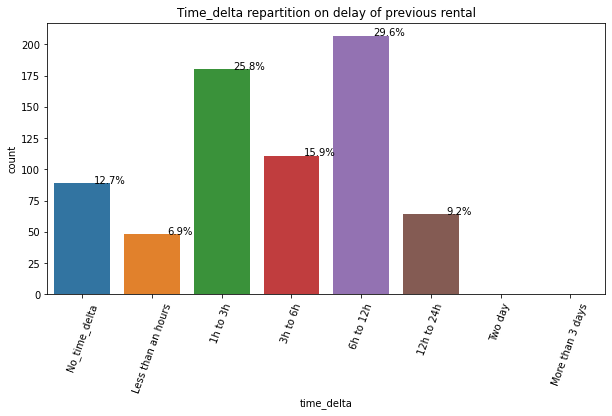

In [44]:
# Graph 4 - Now, we gonna see from late rental, how was the delay between the original time to give back the rental and the next rental
# We gonna used data_F2 and x = 'time_delta'
# Filter used :
#    'previous_rental' == 'Yes"
#    'is_delay == 'Yes

fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(data=data_F2, x="time_delta", order = ["No_time_delta","Less than an hours","1h to 3h", "3h to 6h", "6h to 12h","12h to 24h","Two day", "More than 3 days"])                                                    
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_title("Time_delta repartition on delay of previous rental")
total = float(len(data_F2))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

### Graph 4 - Quick data analysis :
### * We can see that mostly when the delta is from 6h to 12h, the car rental are late at 30%
### * Then, it is the time delta of 1h to 3h with 26%
### * Both, represent 56% of late return.
### * When the time delta of 'Less than an hours', we have only 7% of late return.
### * and 13% are late when they don't have time delta
### * We can conclude that if the time delta is short, there are less late return.

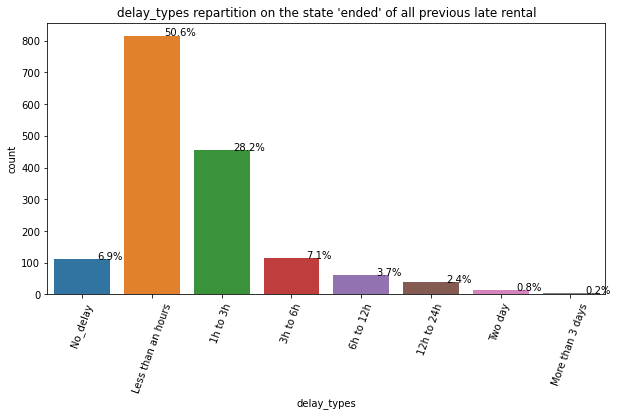

In [64]:
# Graph 6 - Now, we gonna see from late rental, for each state what happend
# We gonna used data_F3 and x = 'delay_types'
# Filter used :
#    'previous_rental' == 'Yes'
#    'is_delay == 'No'
#    'state' == 'ended'

fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(data=data_F3, x="delay_types", order = ["No_delay","Less than an hours","1h to 3h", "3h to 6h", "6h to 12h","12h to 24h","Two day", "More than 3 days"])                                                    
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_title("delay_types repartition on the state 'ended' of all previous late rental")
total = float(len(data_F3))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

### Graph 6 - Quick data analysis :
### * Mostly people are late bellow 3h. It represent 80% of late !

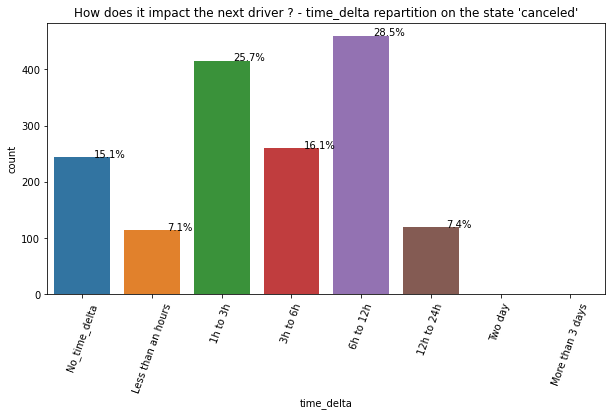

In [65]:
# Graph 7 - Now, we gonna see from late rental, for each state what happend
# We gonna used data_F3 and x = 'time_delta'
# Filter used :
#    'previous_rental' == 'Yes"
#    'is_delay == 'Yes
#    'state' == 'ended'

fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(data=data_F3, x="time_delta", order = ["No_time_delta","Less than an hours","1h to 3h", "3h to 6h", "6h to 12h","12h to 24h","Two day", "More than 3 days"])                                                    
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);
ax.set_title("How does it impact the next driver ? - time_delta repartition on the state 'canceled'");
total = float(len(data_F3))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

### Graph F - Quick data analysis :
#### Here we can analyze that mostly of the 'canceled' state, had a gap of 6h to 12h at 35% and 17% with a gap from 3h to 6h. We can notice that this is not only because le previous rental are late. But they just canceled for unknow reason.
#### But from no time delta to 3h late represent 42% of cancelation

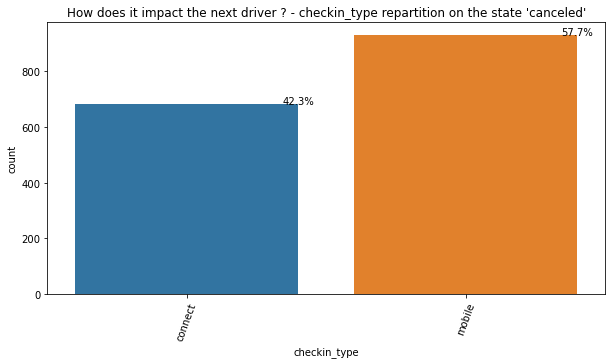

In [47]:
# Graph G - Now, we gonna see from late rental, if check-in type have an impact on late rental
# We gonna used data_F3 and x = 'checkin_type'
# Filter used :
#    'previous_rental' == 'Yes"
#    'is_delay == 'Yes
#    'state' == 'canceled'

fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(data=data_F3, x="checkin_type")                                                    
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);
ax.set_title("How does it impact the next driver ? - checkin_type repartition on the state 'canceled'");
total = float(len(data_F3))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

### Graph G - Quick data analysis :
#### Just to check the checkin_type distribution and as they are almost 50/50, this is not a feature that affect delay. 

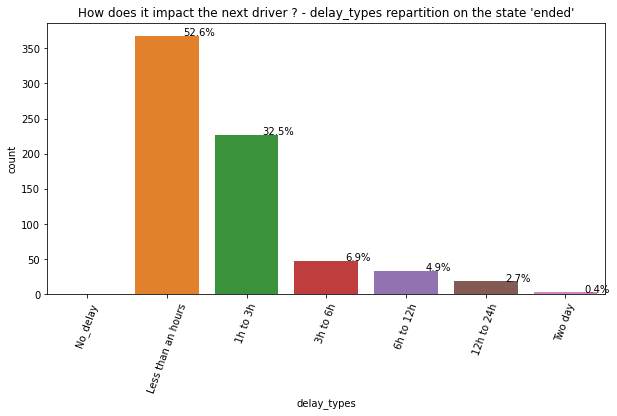

In [48]:
# Graph H - Now, we gonna see from late rental, if check-in type have an impact on late rental
# We gonna used data_F4 and x = 'delay_types'
# Filter used :
#    'previous_rental' == 'Yes"
#    'is_delay == 'Yes
#    'state' == 'ended'

fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(data=data_F4, x="delay_types", order = ['No_delay', 'Less than an hours', '1h to 3h', '3h to 6h','6h to 12h', '12h to 24h', 'Two day'])                                                    
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);
ax.set_title("How does it impact the next driver ? - delay_types repartition on the state 'ended'")
total = float(len(data_F4))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

### Graph H - Quick data analysis :
#### Most of people who keep their renting, can still rent the car until 3h late. it represent 87% under all delay_types

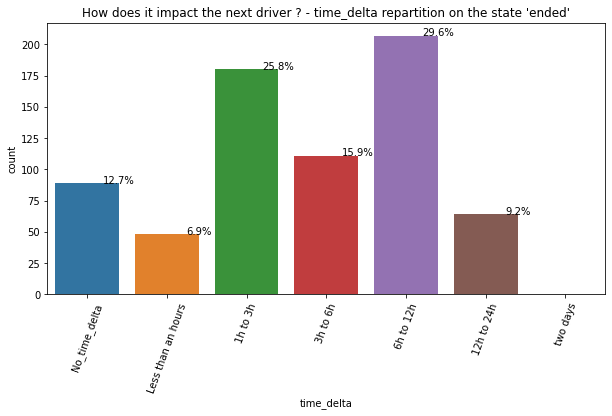

In [49]:
# Graph I - Now, we gonna see from late rental, if check-in type have an impact on late rental
# We gonna used data_F4 and x = 'time_delta'
# Filter used :
#    'previous_rental' == 'Yes"
#    'is_delay == 'Yes
#    'state' == 'ended'

fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(data=data_F4, x="time_delta", order = ['No_time_delta','Less than an hours','1h to 3h', '3h to 6h', '6h to 12h', '12h to 24h', 'two days'])                                                    
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);
ax.set_title("How does it impact the next driver ? - time_delta repartition on the state 'ended'");
total = float(len(data_F4))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

### Graph I - Quick data analysis :
#### Initially, people keep their renting because the time_delta is longer than other. We have 30% of people where the delta with previous rental last 6h to 12h. Then from 1h to 3h is the delay we saw previously that next driver can 'accept' the late. From 3h to 6h represent 16% that we can understand that is because the rate doest represent that more late (only 6%)

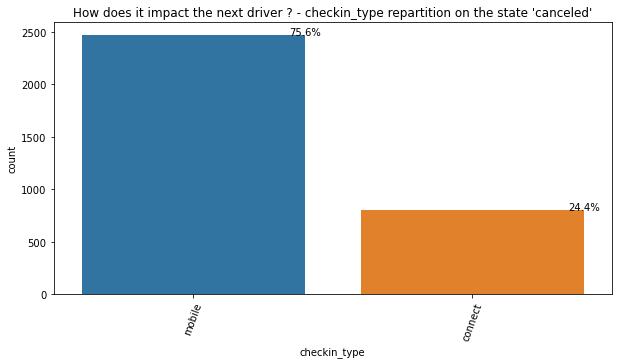

In [50]:
# Looking for the check-in with cancelling

# Graph J - Now, we gonna see from late rental, if check-in type have an impact on late rental
# We gonna used data_F5 and x = 'checkin_type'
# Filter used :
#    'canceled' == 'Yes"


fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(data=data_F5, x="checkin_type")                                                    
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);
ax.set_title("How does it impact the next driver ? - checkin_type repartition on the state 'canceled'");
total = float(len(data_F5))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

In [51]:
### Graph J - Quick data analysis :
#### From all cancelation the most chekin-in type is 'mobile' with 77%

# QUESTION 3 : How many problematic cases will it solve depending on the chosen threshold and scope ?

# Setting the threshold and the scope 

From the analysis above :
* we can see that a threshold of 3h between rental car will solve 42 % of canceling. 
* But it is not only a minimum threshold we have to do because some canceling wasn't due to only delay. 
* We can state to a minimum canceling at 24h before and if it is less, canceler have to pay an adapt price as penalty. 
* In an other hand, check-in type has no influence about late, but there is 76% of canceling coming from Mobile check-in type. 

==> **Threshold** : 
 * Minimum time between two rental will be set up at 3h
 * Minimum canceling would be 24h before the time rental

 ==> **Scope** :
 * Even it is almost 50/50 with previous rental, the type of checking is up to 76% for mobile. We should have an action on it.

# QUESTION 4 : How many rentals would be affected by the feature depending on the threshold and scope we choose ?

So, now, we gonna measure the impact of those feature (Threshold and Scope)

We saw earlier that :
* 

As we can see, 

# QUESTION 5 : Which share of our owner's revenue would potentially be affected by the feature ?

In [52]:
data_price = pd.read_csv("src/get_around_pricing_project.csv")

In [53]:
data_price.head()


,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [54]:
data_price["rental_price_per_day"].mean()

121.21453644435267

In [55]:
dataset.head()

,rental_id,car_id,checkin_type,state,previous_rental,is_delay,delay_types,time_delta
0,505000.0,363965.0,mobile,canceled,No,No,No_delay,No_time_delta
1,507750.0,269550.0,mobile,ended,No,Yes,1h to 3h,No_time_delta
2,508131.0,359049.0,connect,ended,No,No,1h to 3h,No_time_delta
3,508865.0,299063.0,connect,canceled,No,No,No_delay,No_time_delta
4,511440.0,313932.0,mobile,ended,No,No,No_delay,No_time_delta


In [56]:
dataset['delay_types'].unique()

array(['No_delay', '1h to 3h', '3h to 6h', 'Less than an hours',
       'Two day', '6h to 12h', '12h to 24h', 'More than 3 days',
       'One day'], dtype=object)

In [57]:
mask7 = dataset['delay_types'].isin(['No_delay', 'Less than an hours','1h to 3h'])

In [58]:
data_Q7 = dataset.loc[mask7,:]

In [59]:
data_Q7

,rental_id,car_id,checkin_type,state,previous_rental,is_delay,delay_types,time_delta
0,505000.0,363965.0,mobile,canceled,No,No,No_delay,No_time_delta
1,507750.0,269550.0,mobile,ended,No,Yes,1h to 3h,No_time_delta
2,508131.0,359049.0,connect,ended,No,No,1h to 3h,No_time_delta
3,508865.0,299063.0,connect,canceled,No,No,No_delay,No_time_delta
4,511440.0,313932.0,mobile,ended,No,No,No_delay,No_time_delta
...,...,...,...,...,...,...,...,...
21304,573322.0,376491.0,connect,ended,No,Yes,1h to 3h,No_time_delta
21305,573446.0,380069.0,mobile,ended,Yes,No,No_delay,3h to 6h
21307,573791.0,364890.0,mobile,ended,No,No,1h to 3h,No_time_delta
21308,574852.0,362531.0,connect,ended,No,Yes,1h to 3h,No_time_delta


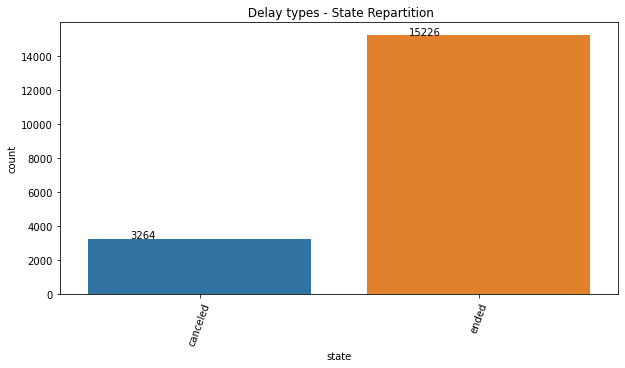

In [60]:
fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(data=data_Q7, x="state")                               
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);
ax.set_title(" Delay types - State Repartition");
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))


In [61]:
dataset.head()

,rental_id,car_id,checkin_type,state,previous_rental,is_delay,delay_types,time_delta
0,505000.0,363965.0,mobile,canceled,No,No,No_delay,No_time_delta
1,507750.0,269550.0,mobile,ended,No,Yes,1h to 3h,No_time_delta
2,508131.0,359049.0,connect,ended,No,No,1h to 3h,No_time_delta
3,508865.0,299063.0,connect,canceled,No,No,No_delay,No_time_delta
4,511440.0,313932.0,mobile,ended,No,No,No_delay,No_time_delta


In [62]:
mask8 = dataset['state'] == 'canceled'
data_Q8 = dataset.loc[mask8,:]

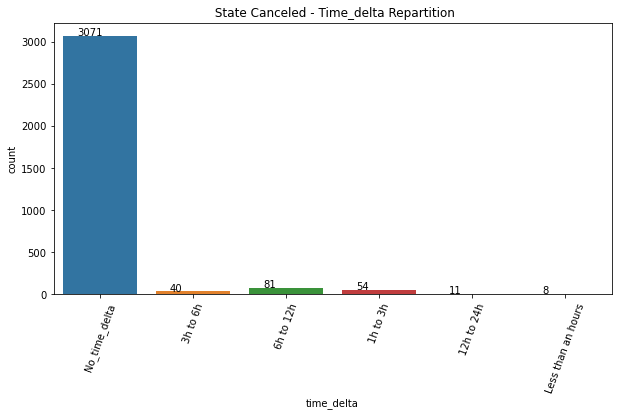

In [63]:
fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(data=data_Q8, x="time_delta")                               
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);
ax.set_title(" State Canceled - Time_delta Repartition");
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))